# Date A Scientist

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this capstone, I will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.

The dataset provided has the following columns of multiple-choice data:

* body_type
* diet
* drinks
* drugs
* education
* ethnicity
* height
* income
* job
* offspring
* orientation
* pets
* religion
* sex
* sign
* smokes
* speaks
* status

And a set of open short-answer responses to :

* essay0 - My self summary
* essay1 - What I’m doing with my life
* essay2 - I’m really good at
* essay3 - The first thing people usually notice about me
* essay4 - Favorite books, movies, show, music, and food
* essay5 - The six things I could never do without
* essay6 - I spend a lot of time thinking about
* essay7 - On a typical Friday night I am
* essay8 - The most private thing I am willing to admit
* essay9 - You should message me if…


In [463]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Exploring the Data

In [464]:
df = pd.read_csv("profiles.csv")

In [465]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [466]:
df.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

In [467]:
df.job.head()

0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object

In [468]:
df.age.head()

0    22
1    35
2    38
3    23
4    29
Name: age, dtype: int64

In [469]:
df.income.head()

0       -1
1    80000
2       -1
3    20000
4       -1
Name: income, dtype: int64

In [470]:
df.essay0.head()

0    about me:<br />\n<br />\ni would love to think...
1    i am a chef: this is what that means.<br />\n1...
2    i'm not ashamed of much, but writing public te...
3            i work in a library and go to school. . .
4    hey how's it going? currently vague on the pro...
Name: essay0, dtype: object

In [471]:
df.essay6.head()

0    duality and humorous things
1                            NaN
2                            NaN
3     cats and german philosophy
4                            NaN
Name: essay6, dtype: object

In [472]:
df.education.value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [473]:
df.drinks.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [474]:
df.drugs.value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [475]:
df.smokes.value_counts()

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

## Visualising some of the Data

Let's look at the distribution of age.

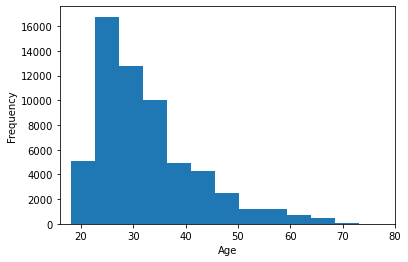

In [476]:
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

## Formulating a Question

Looking at the available data I am interested to see if if by using the data on `drinks` `drugs`, `smokes`, and `essay length` could classify a person's sex. 

## Augement the Data

As the columns `drinks`, `drugs` and `smokes` are categorical I need to create some new columns mapping these to numerical values.

In [477]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
drugs_mapping = {"never":0, "sometimes":1, "often":2}
smokes_mapping = {"no":0, "sometimes":1, "when drinking":2, "trying to quit":3, "yes":4}

df["drinks_code"] = df.drinks.map(drink_mapping)
df["drugs_code"] = df.drugs.map(drugs_mapping)
df["smokes_code"] = df.smokes.map(smokes_mapping)

In [478]:
df.drugs_code.value_counts()

0.0    37724
1.0     7732
2.0      410
Name: drugs_code, dtype: int64

In [479]:
df.smokes_code.value_counts()

0.0    43896
1.0     3787
2.0     3040
4.0     2231
3.0     1480
Name: smokes_code, dtype: int64

In [480]:
df.drinks_code.value_counts()

2.0    41780
1.0     5957
3.0     5164
0.0     3267
4.0      471
5.0      322
Name: drinks_code, dtype: int64

The numerical mapping for `drinks`, `drugs` and `smokes` has mapped correctly. Now to create some a new columns for `essay length`.

For the `essay length` I will need to combine all the short essay answers and take the length. I will also need to remove the `NANs`.

In [481]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

#Removing the NANs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)

#Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

#Creating new column in df
df["essay_length"] = all_essays.apply(lambda x: len(x))

In [482]:
df.essay_length.head()

0    2644
1    1453
2    5517
3     477
4     725
Name: essay_length, dtype: int64

In [483]:
all_essays[0]

"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake myself a little better everyday, in some productively lazy\nway. got tired of tying my shoes. considered hiring a five year\nold, but would probably have to tie both of our shoes... decided to\nonly wear leather shoes dress shoes.<br />\n<br />\nabout you:<br />\n<br />\nyou love to have really serious, really deep conversations about\nreally silly stuff. you have to be willing to snap me out of a\nlight hearted rant with a kiss. you don't have to be funny, but you\nhave to be able to make me laugh. you

In [484]:
len(df.index)

59946

In [485]:
df['smokes_code'].isna().sum()

5512

In [486]:
df['drugs_code'].isna().sum()

14080

In [487]:
df['smokes_code'].isna().sum()

5512

In [488]:
df['essay_length'].isna().sum()

0

There are a number of `NaN` values in the `drinks_code`, `drugs_code` and the `smokes_code`. I will remove these from the dataset. 

In [489]:
df = df.dropna(axis=0, subset=['drinks_code','smokes_code','drugs_code', 'smokes_code'])

In [490]:
len(df.index)

42495

In [491]:
df['smokes_code'].isna().sum()

0

In [492]:
df['drugs_code'].isna().sum()

0

## Normalising the Data

In [493]:
from sklearn import preprocessing

feature_data = df[['drinks_code','drugs_code', 'smokes_code', 'essay_length']]

x = feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

In [494]:
feature_data.head()

,drinks_code,drugs_code,smokes_code,essay_length
0,0.4,0.0,0.25,0.027372
1,0.6,0.5,0.00,0.015000
2,0.4,0.0,0.00,0.007438
3,0.4,0.0,0.00,0.012787
4,0.0,0.0,0.00,0.025045


In [495]:
labels = df['sex']

In [496]:
len(feature_data.index)

42495

In [497]:
len(labels.index)

42495

## Classification Model

In [498]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [499]:
train_data, test_data, train_labels, test_labels = train_test_split(feature_data, labels, test_size=0.2, random_state=1)

In [500]:
classifier = KNeighborsClassifier(n_neighbors=10)

In [501]:
classifier.fit(train_data, train_labels)

KNeighborsClassifier(n_neighbors=10)

In [502]:
classifier.score(test_data, test_labels)

0.5299446993763972

In [503]:
scores = []
max_score = 0
k = 0

for k in range(1,200):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    score = classifier.score(test_data, test_labels)
    scores.append(score)

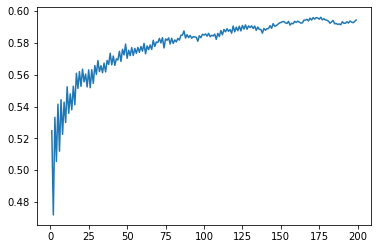

In [504]:
plt.plot(range(1,200), scores)
plt.show()

### Results

You can see from the features used the best accuracy that can be achieved is around just under 60%. I am going to add `income` to the features to see if this improves the accuracry.  

## Adding Income to the Features

In [505]:
df.income.value_counts()

-1          33165
 20000       2499
 100000      1273
 80000        906
 30000        868
 40000        832
 50000        786
 60000        585
 70000        570
 150000       495
 1000000      365
 250000       118
 500000        33
Name: income, dtype: int64

In [506]:
df.income.isna().sum()

0

I am going to remove the rows that contain -1. This will significantly reduce the dataset, so it will be interesting to see how the model performs. 

In [507]:
new_df = df[df.income != -1]

In [508]:
len(new_df.index)

9330

In [509]:
new_feature_data = new_df[['drinks_code','drugs_code', 'smokes_code', 'essay_length', 'income']]

x = new_feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

new_feature_data = pd.DataFrame(x_scaled, columns=new_feature_data.columns)

In [510]:
new_feature_data.head()

,drinks_code,drugs_code,smokes_code,essay_length,income
0,0.6,0.5,0.0,0.015000,0.061224
1,0.4,0.0,0.0,0.047991,0.020408
2,0.4,0.0,0.0,0.000000,0.010204
3,0.4,0.0,0.0,0.027008,0.030612
4,0.4,0.5,0.0,0.043628,1.000000


In [511]:
new_labels = new_df['sex']

In [516]:
train_data, test_data, train_labels, test_labels = train_test_split(new_feature_data, new_labels, test_size=0.2, random_state=1)

In [517]:
scores_2 = []

for k in range(1,200):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    score = classifier.score(test_data, test_labels)
    scores_2.append(score)

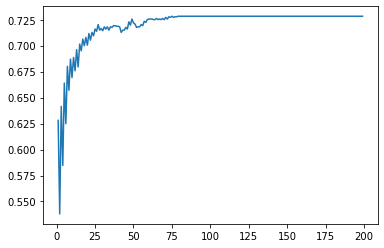

In [518]:
plt.plot(range(1,200), scores_2)
plt.show()

### Results

By adding imcome to the features the accuracy has jumped up to around 72.5%.

I am now going to add height to the model. 

## Adding Height to the Features

In [519]:
new_df.height.value_counts()

70.0    1100
72.0     996
71.0     877
68.0     849
69.0     826
67.0     743
66.0     659
73.0     554
65.0     478
74.0     463
64.0     443
63.0     297
75.0     279
62.0     237
76.0     165
61.0     108
60.0      91
77.0      50
59.0      24
78.0      22
79.0      17
80.0       8
95.0       6
82.0       6
58.0       5
81.0       3
55.0       3
83.0       3
91.0       2
56.0       2
53.0       2
36.0       2
26.0       1
9.0        1
50.0       1
47.0       1
84.0       1
90.0       1
1.0        1
87.0       1
54.0       1
94.0       1
Name: height, dtype: int64

In [520]:
new_df['height'].isna().sum()

0

In [521]:
new_feature_data = new_df[['drinks_code','drugs_code', 'smokes_code', 'essay_length', 'income', 'height']]

x = new_feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

new_feature_data = pd.DataFrame(x_scaled, columns=new_feature_data.columns)

In [522]:
new_feature_data.head()

,drinks_code,drugs_code,smokes_code,essay_length,income,height
0,0.6,0.5,0.0,0.015000,0.061224,0.734043
1,0.4,0.0,0.0,0.047991,0.020408,0.755319
2,0.4,0.0,0.0,0.000000,0.010204,0.691489
3,0.4,0.0,0.0,0.027008,0.030612,0.648936
4,0.4,0.5,0.0,0.043628,1.000000,0.702128


In [523]:
train_data, test_data, train_labels, test_labels = train_test_split(new_feature_data, new_labels, test_size=0.2, random_state=1)

In [524]:
scores_3 = []

for k in range(1,200):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    score = classifier.score(test_data, test_labels)
    scores_3.append(score)

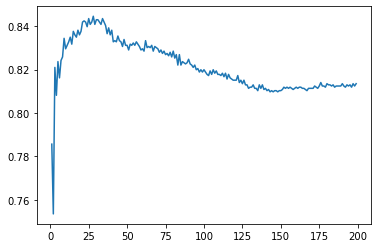

In [525]:
plt.plot(range(1,200), scores_3)
plt.show()

### Results

By adding height the accuracy has improved to just over 84% and the k value has reduced also. It makes sense adding height improves the model accuracy as with the normal distribution of height males are more likely to be taller than females. 